In [2]:
import networkx as nx
from IsingNetwork import IsingSystem
import numpy as np
from tqdm import tqdm

In [5]:
g = nx.barabasi_albert_graph(500, 5)
t_range = np.linspace(1, 30, 100)

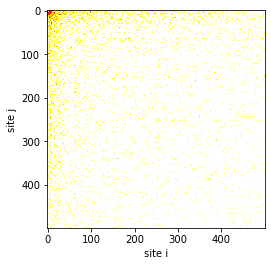

In [6]:
import matplotlib.pyplot as plt


adj_matrix = nx.adjacency_matrix(g)
plt.imshow(adj_matrix.toarray(), cmap='hot_r')

#plt.gca().invert_yaxis()

plt.xlabel('site i')
plt.ylabel('site j')
plt.rcParams['figure.figsize'] = [12, 8]


In [3]:
model = IsingSystem(g, temp_range=t_range, num_iterations=20000, coupling_constant=1.0, is_symmetric=False)

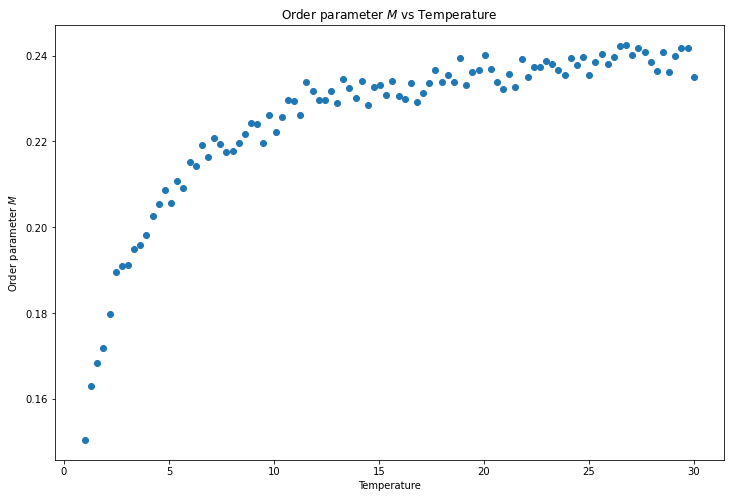

In [5]:

model.iterate_over_temperatures()
model.plot('magnetization_per_spin', r'Order parameter $M$')

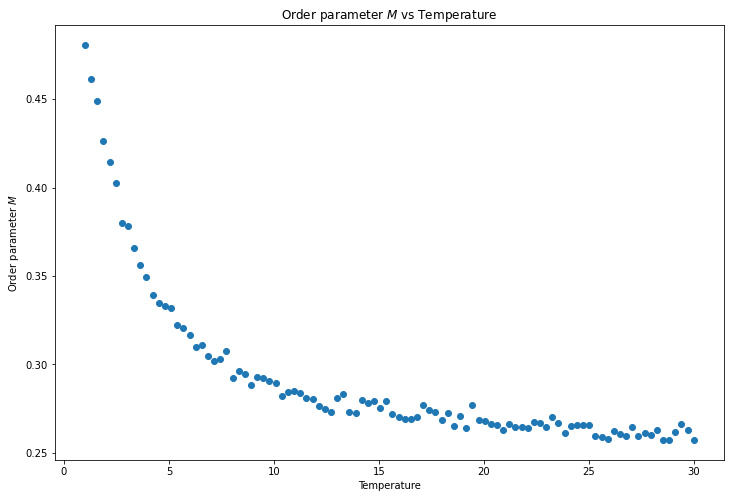

In [6]:
model.update_coupling_constant(-1)
model.iterate_over_temperatures()
model.plot('magnetization_per_spin',r'Order parameter $M$')

In [4]:
h_range = [0.01, 0.1, 1, 10, 100]

In [5]:
M = []
for h in tqdm(h_range):
    model.update_external_field_strength(h)
    model.iterate_over_temperatures()
    M.append(model.retrieve_data('magnetization_per_spin'))

100%|██████████| 5/5 [56:06<00:00, 673.20s/it]


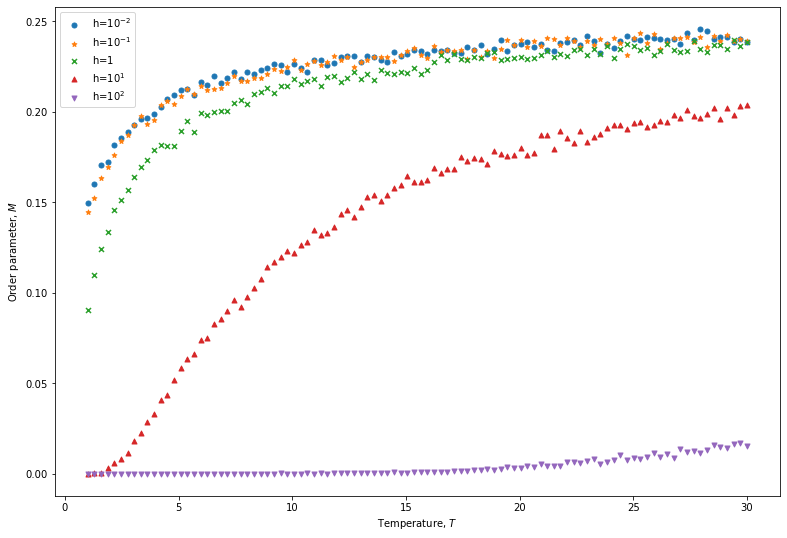

In [15]:
import matplotlib.pyplot as plt

h_strings = [r'$10^{-2}$', r'$10^{-1}$', r'$1$', r'$10^1$', r'$10^2$']

markers = ['o', '*', 'x', '^', 'v']

plt.figure(figsize=(13, 9)) 
for i in range(len(M)):
    plt.scatter(t_range, M[i], label='h='+ h_strings[i], marker=markers[i % len(markers)], s=25)

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [12]:
# You can save the list M by doing:

np.savez('M(T)_N=500_iteration=20000_J=1.npz', *M)

In [ ]:
#To load the same data:
loaded_data = np.load('M(T)_N=500_iteration=20000_J=1.npz')
loaded_list = [loaded_data[key] for key in loaded_data.keys()]


for i in range(len(loaded_list)):
    plt.scatter(t_range, loaded_list[i], label='h='+ h_strings[i])

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [16]:
model.update_coupling_constant(-1)
M = []
for h in tqdm(h_range):
    model.update_external_field_strength(h)
    model.iterate_over_temperatures()
    M.append(model.retrieve_data('magnetization_per_spin'))

100%|██████████| 5/5 [54:14<00:00, 650.85s/it]


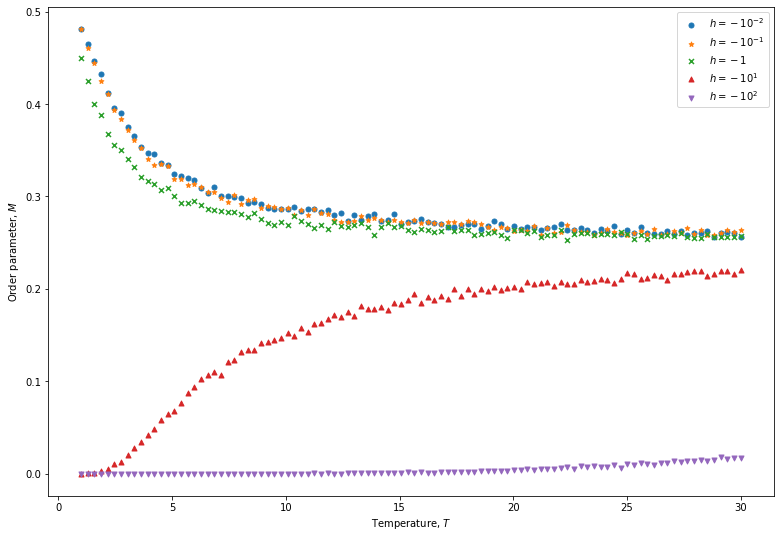

In [24]:
import matplotlib.pyplot as plt

h_strings = [r'$h=-10^{-2}$', r'$h=-10^{-1}$', r'$h=-1$', r'$h=-10^1$', r'$h=-10^2$']

markers = ['o', '*', 'x', '^', 'v']

plt.figure(figsize=(13, 9)) 
for i in range(len(M)):
    plt.scatter(t_range, M[i], label=h_strings[i], marker=markers[i % len(markers)], s=25)

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [14]:
np.savez('M(T)_N=500_iteration=20000_J=-1.npz', *M)

In [15]:
#FIGURE 3.4

In [16]:
T = 0.1
J_range = 1
h_range = np.linspace(-10,10,100)

In [17]:
from joblib import Parallel, delayed    #to compute things in parallel
import multiprocessing
num_cores = multiprocessing.cpu_count()

def iterateForH(h):
    model.update_external_field_strength(h)
    data = model.run_simulation(T)

    return data['magnetization_per_spin']

In [18]:
model.update_coupling_constant(1)
MVsH_J1 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

In [19]:
model.update_coupling_constant(-1)
MVsH_J2 = Parallel(n_jobs=num_cores)(delayed(iterateForH)(h) for h in h_range)

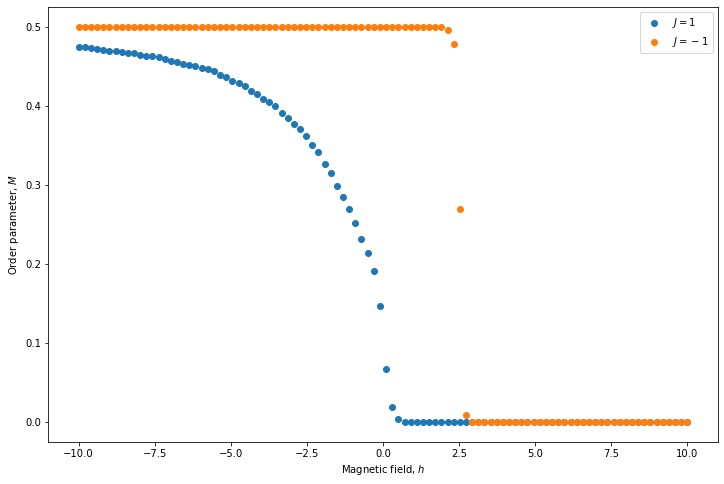

In [20]:
plt.scatter(h_range, MVsH_J1, label=r'$J=1$')
plt.scatter(h_range, MVsH_J2, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [21]:
MvsH = [MVsH_J1, MVsH_J2]
np.savez('M(h)_N=500_iteration=20000.npz', *MvsH)

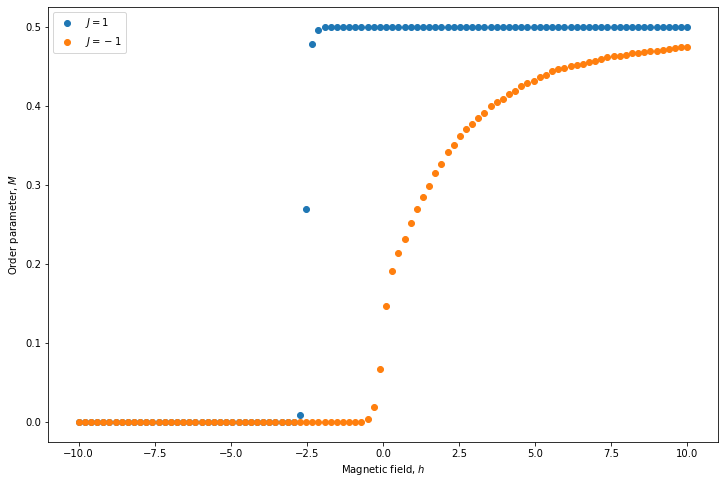

In [22]:
invertJ1 = MVsH_J1[::-1]
invertJ2 = MVsH_J2[::-1]

plt.scatter(h_range, invertJ2, label=r'$J=1$')
plt.scatter(h_range, invertJ1, label=r'$J=-1$')

plt.legend()
plt.xlabel(r'Magnetic field, $h$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

In [9]:
#Load data:
loaded_data = np.load('M(T)_N=500_iteration=20000_J=1.npz')
loaded_list = [loaded_data[key] for key in loaded_data.keys()]

h_strings = [r'$h = -10^{-2}$', r'$h=-10^{-1}$', r'$h=-1$', r'$h=-10^1$', r'$h=-10^2$']

markers = ['o', '*', 'x', '^', 'v']

plt.figure(figsize=(13, 9)) 
for i in range(len(M)):
    plt.scatter(t_range, M[i], label= h_strings[i], marker=markers[i % len(markers)], s=25)

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

NameError: name 'M' is not defined

<Figure size 936x648 with 0 Axes>

In [18]:
flipM_J1 = []

for i in range(len(M)):
    flipM_J1.append([1 - x for x in M[i]])

In [19]:
flipM_J2 = []

for i in range(len(loaded_list)):
    flipM_J2.append([1 - x for x in loaded_list[i]])

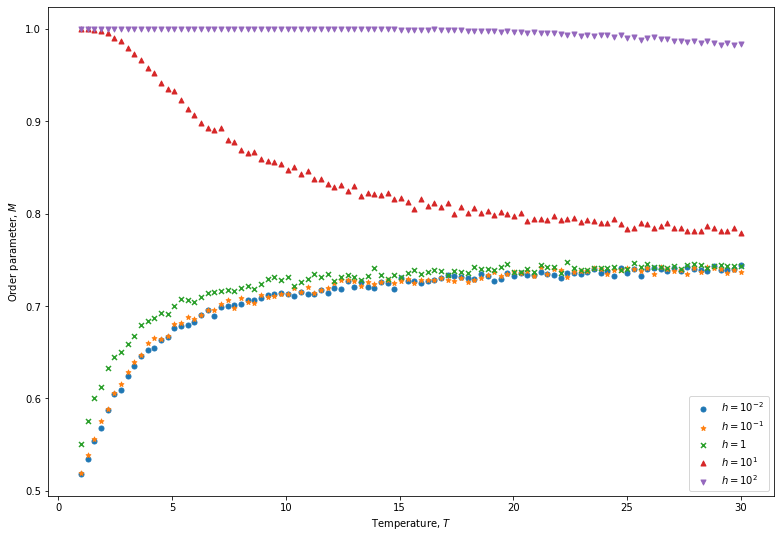

In [22]:
import matplotlib.pyplot as plt

h_strings = [r'$h=10^{-2}$', r'$h=10^{-1}$', r'$h=1$', r'$h=10^1$', r'$h=10^2$']

markers = ['o', '*', 'x', '^', 'v']

plt.figure(figsize=(13, 9)) 
for i in range(len(flipM_J1)):
    plt.scatter(t_range, flipM_J1[i], label=h_strings[i], marker=markers[i % len(markers)], s=25)

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()

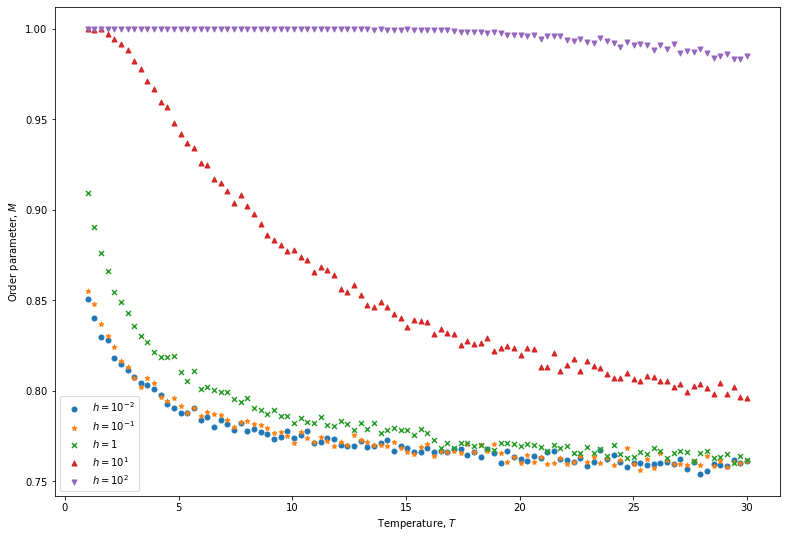

In [23]:
import matplotlib.pyplot as plt

h_strings = [r'$h=10^{-2}$', r'$h=10^{-1}$', r'$h=1$', r'$h=10^1$', r'$h=10^2$']

markers = ['o', '*', 'x', '^', 'v']

plt.figure(figsize=(13, 9)) 
for i in range(len(flipM_J2)):
    plt.scatter(t_range, flipM_J2[i], label=h_strings[i], marker=markers[i % len(markers)], s=25)

plt.legend()
plt.xlabel(r'Temperature, $T$')
plt.ylabel(r'Order parameter, $M$')
plt.show()